In [1]:
#importing required libraries
#We will first import the python libraries that we will need for performing our analysis.

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import warnings library
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
#Loading our dataset
#Reading our german_data.csv dataset and storing the contents in a dataframe

data_frame = pd.read_csv('german_credit_data.csv')

In [4]:
#Previewing the dataframe. 
data_frame.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Data Exploration 

In [5]:
#Determining the shape of the dataframe
data_frame.shape


(1000, 11)

In [6]:
#Generating a statistical summary of numerical variables
data_frame.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
#We can still check for missing values
data_frame.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
#Checking the datatypes
data_frame.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [9]:
data_frame.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [10]:
data_frame.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
#Dropping 'Unnamed: 0' variable.
data_frame.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
#Inspecting the new dataframe
data_frame.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
#Getting unique values of each variables
cols = data_frame.columns.to_list()
cols

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [14]:
for col in cols:
    print("Variable:", col)
    print("Number of unique values:", data_frame[col].nunique())
    print(data_frame[col].unique())

Variable: Age
Number of unique values: 53
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Variable: Sex
Number of unique values: 2
['male' 'female']
Variable: Job
Number of unique values: 4
[2 1 3 0]
Variable: Housing
Number of unique values: 3
['own' 'free' 'rent']
Variable: Saving accounts
Number of unique values: 4
[nan 'little' 'quite rich' 'rich' 'moderate']
Variable: Checking account
Number of unique values: 3
['little' 'moderate' nan 'rich']
Variable: Credit amount
Number of unique values: 921
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 1

In [15]:
#Check for missing values
data_frame.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [16]:
#Dealing with missing values
data_frame['Saving accounts'].fillna('NoSavingAcc', inplace = True)
data_frame['Checking account'].fillna('NoSavingAcc', inplace = True)

In [17]:
#Checking for missing vaues
data_frame.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

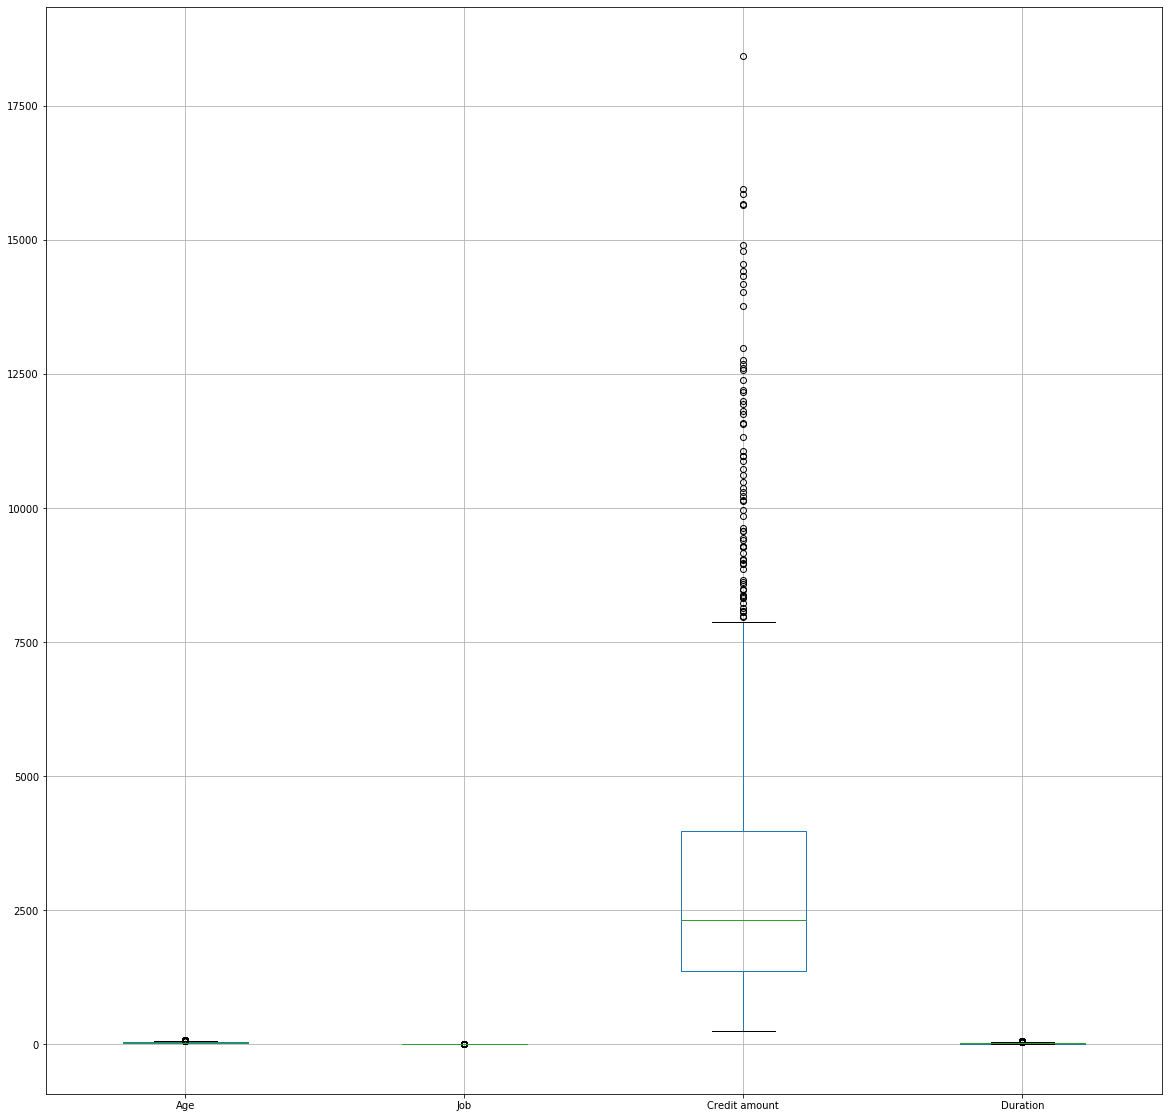

In [18]:
#Checking for outliers
plt.figure(figsize = (20,20))
data_frame.boxplot()
plt.show()

In [19]:
data_frame.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

### Univariate analysis 

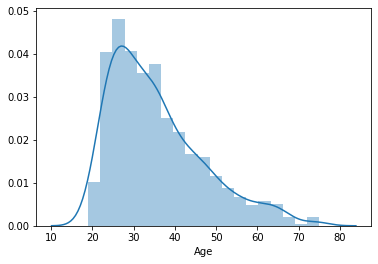

In [20]:
#Univariate analysis: age variable
sns.distplot(data_frame.Age)

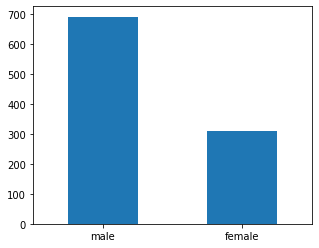

In [21]:
#Univariate analysis: sex variable
plt.figure(figsize = (5,4))
data_frame.Sex.value_counts().plot(kind = 'bar', rot = 0)

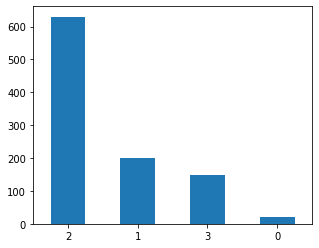

In [22]:
#Univariate analysis: job variable
plt.figure(figsize = (5,4))
data_frame.Job.value_counts().plot(kind = 'bar', rot = 0)

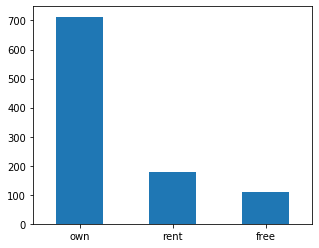

In [23]:
#Univariate analysis: housing variable
plt.figure(figsize = (5,4))
data_frame.Housing.value_counts().plot(kind = 'bar', rot = 0)

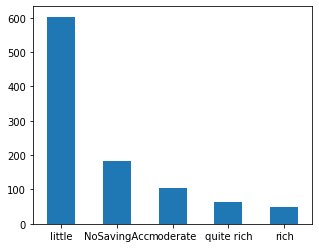

In [24]:
#Univariate analysis: Savings account variable
plt.figure(figsize = (5,4))
data_frame['Saving accounts'].value_counts().plot(kind = 'bar', rot = 0)

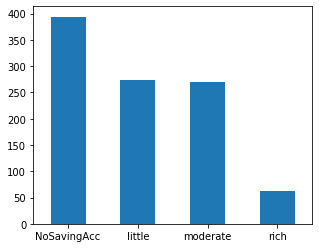

In [25]:
#Univariate analysis: checking account variable
plt.figure(figsize = (5,4))
data_frame['Checking account'].value_counts().plot(kind = 'bar', rot = 0)

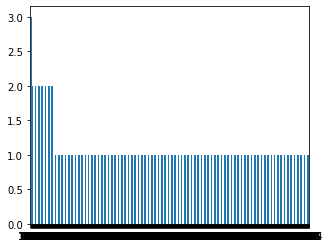

In [26]:
#Univariate analysis: credit amount variable
plt.figure(figsize = (5,4))
data_frame['Credit amount'].value_counts().plot(kind = 'bar', rot = 0)

### Data Preparation 

In [27]:
#Label binarizer converts the string categorical variable to binary
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
data_frame['Risk'] = lb.fit_transform(data_frame['Risk'])


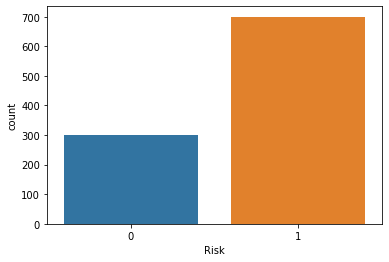

In [28]:
#Plotting risk distributions to understand whether there are more records with more categories than the others.
sns.countplot('Risk', data = data_frame)

In [29]:
#Performing binning on duration
#We bin by specifying 6 bins
data_frame['Duration'] = pd.qcut(data_frame.Duration, q=6)

In [30]:
# performing binning on credit_amount
# this time we bin without specifying i.e. we create 6 bins
data_frame["Credit amount"] = pd.qcut(data_frame['Credit amount'], q = 5)

In [31]:
# performing binning on age
# we bin by defining the intervals and categories
interval = (18, 25, 35, 60, 120)
categories = ['student', 'youth', 'adult', 'senior']
data_frame["Age"] = pd.cut(data_frame.Age, interval, labels = categories)

In [32]:
data_frame.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [33]:
#Performing one hot encoding to variables
one_hot_var = ['Purpose','Job','Sex','Housing','Saving accounts','Checking account','Age','Duration','Credit amount']

for i in one_hot_var:
    
    data_frame = data_frame.merge(pd.get_dummies(data_frame[i], drop_first=True, prefix=i), left_index=True, right_index=True)
    data_frame.head()


In [34]:
data_frame.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Age_senior,"Duration_(10.0, 12.0]","Duration_(12.0, 18.0]","Duration_(18.0, 24.0]","Duration_(24.0, 36.0]","Duration_(36.0, 72.0]","Credit amount_(1262.0, 1906.8]","Credit amount_(1906.8, 2852.4]","Credit amount_(2852.4, 4720.0]","Credit amount_(4720.0, 18424.0]"
0,senior,male,2,own,NoSavingAcc,little,"(249.999, 1262.0]","(3.999, 10.0]",radio/TV,1,...,1,0,0,0,0,0,0,0,0,0
1,student,female,2,own,little,moderate,"(4720.0, 18424.0]","(36.0, 72.0]",radio/TV,0,...,0,0,0,0,0,1,0,0,0,1
2,adult,male,1,own,little,NoSavingAcc,"(1906.8, 2852.4]","(10.0, 12.0]",education,1,...,0,1,0,0,0,0,0,1,0,0
3,adult,male,2,free,little,little,"(4720.0, 18424.0]","(36.0, 72.0]",furniture/equipment,1,...,0,0,0,0,0,1,0,0,0,1
4,adult,male,2,free,little,little,"(4720.0, 18424.0]","(18.0, 24.0]",car,0,...,0,0,0,1,0,0,0,0,0,1


In [35]:
# We then exclude the missing columns since we have new variables for use.
for new in one_hot_var:
    del data_frame[new]

In [36]:
#Preview updated dataframe
data_frame.head()

,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Job_1,Job_2,...,Age_senior,"Duration_(10.0, 12.0]","Duration_(12.0, 18.0]","Duration_(18.0, 24.0]","Duration_(24.0, 36.0]","Duration_(36.0, 72.0]","Credit amount_(1262.0, 1906.8]","Credit amount_(1906.8, 2852.4]","Credit amount_(2852.4, 4720.0]","Credit amount_(4720.0, 18424.0]"
0,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [37]:
# Dividing our dataset into features (X) and target (y)
X = data_frame.drop(['Risk'], axis = 1).values
y = data_frame['Risk'].values
print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


In [38]:
# Splitting our dataset into 80-20 train_test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [40]:
# model creation
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()

# training our model
logistic_classifier.fit(X_train, y_train)

# making predictions
y_pred_logistic = logistic_classifier.predict(X_test)

In [45]:
import pickle
# Open a file you want to store the data
file = open('credit_scoring_model.pkl', 'wb')

# Dump information to that file
pickle.dump(logistic_classifier, file)